# Support vector regression


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import json

In [27]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
# Standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)


In [30]:
def run_model(model, model_name, X_train, y_train, X_test, y_test, df):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Indices for sorting during plotting
    idx_train = np.argsort(X_train, axis=0).ravel()
    idx_test = np.argsort(X_test, axis=0).ravel()

    fig, ax = plt.subplots(
        1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
    )
    reg_plot(
        ax=ax[0],
        X=X_train[idx_train, :1],
        y=y_train[idx_train],
        y_pred=y_train_pred[idx_train],
        title="Train",
    )
    reg_plot(
        ax=ax[1],
        X=X_test[idx_test, :1],
        y=y_test[idx_test],
        y_pred=y_test_pred[idx_test],
        title="test",
        color="limegreen",
    )
    fig.supxlabel("Lower status of the population [LSTAT]")
    fig.supylabel("Median value of homes in $1000s [MEDV]")

    fig, ax = plt.subplots(
        1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
    )
    res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
    res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
    fig.supxlabel("Predicted values")
    fig.supylabel("Residual")

    df = store_results(
        df=df,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df


## Support vector regressor


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,"{""C"": 1, ""epsilon"": 0.1}",33.107777,36.569419,0.609415,0.560809
1,"{""C"": 1, ""epsilon"": 1}",33.486564,36.649561,0.604946,0.559847
2,"{""C"": 1, ""epsilon"": 10}",42.915113,47.744311,0.493714,0.426602
3,"{""C"": 1, ""epsilon"": 100}",107.369972,113.104408,-0.266685,-0.358359


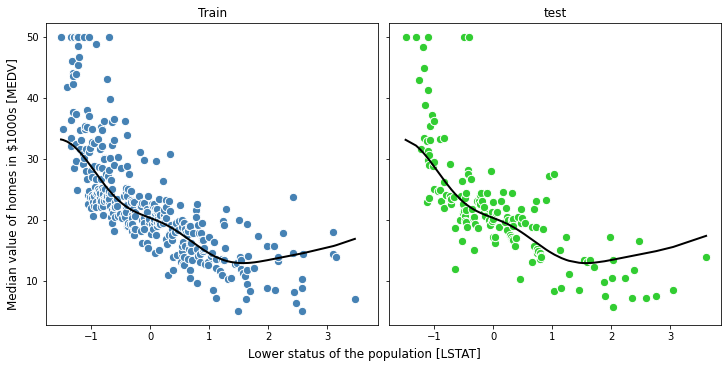

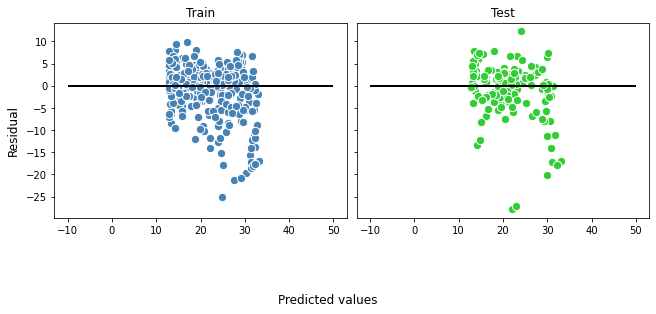

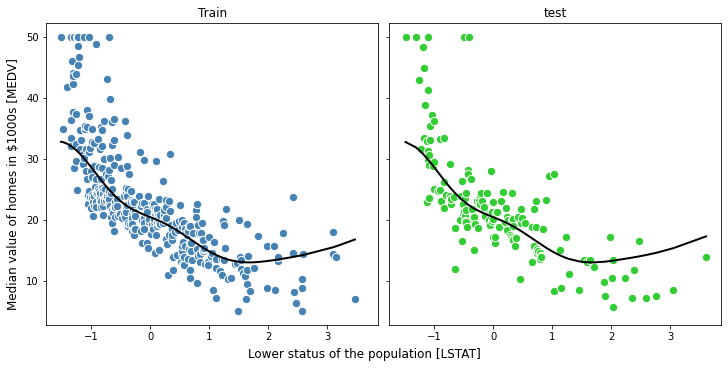

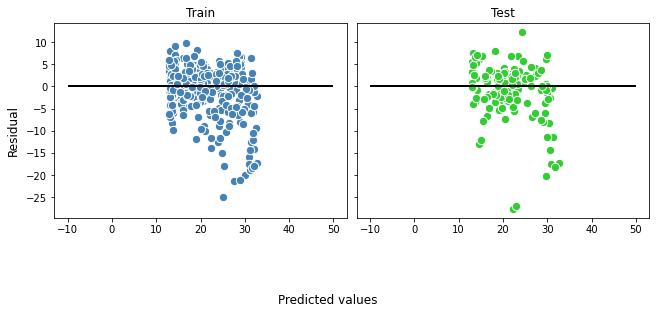

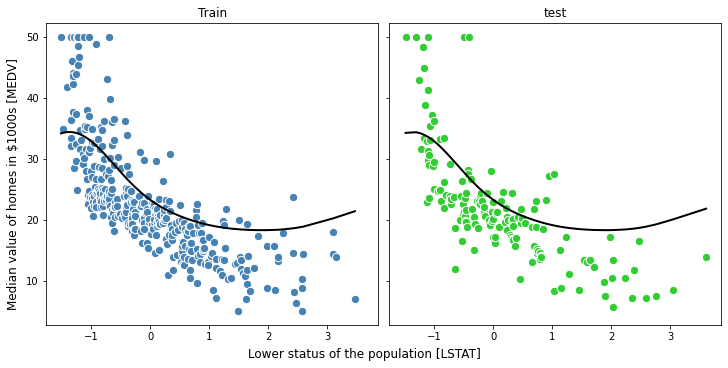

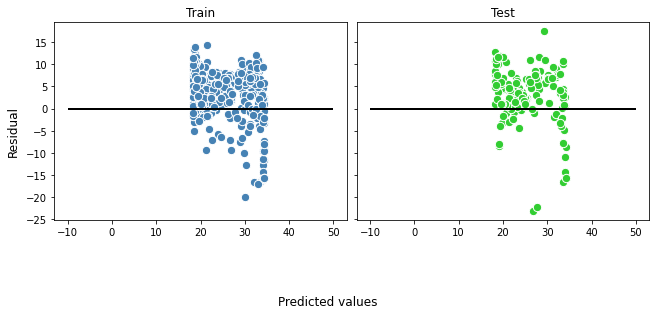

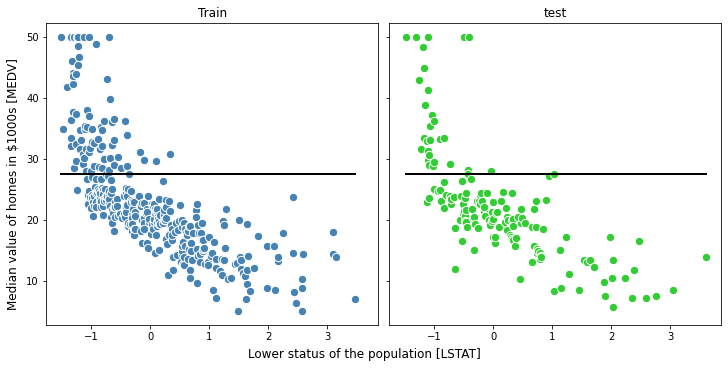

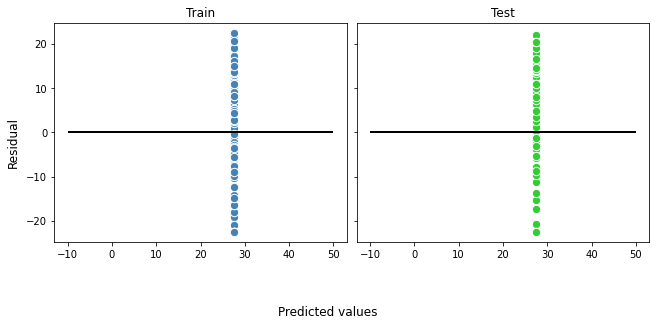

In [31]:
from sklearn.svm import SVR

params = [{
    'C': 1,
    'epsilon': 0.1,
},
{
    'C': 1,
    'epsilon': 1,
},
{
    'C': 1,
    'epsilon': 10,
},
{
    'C': 1,
    'epsilon': 100,
}
]

dfAll = pd.DataFrame()
for idx, param in enumerate(params):
    svr = SVR(**param)
    dfAll = run_model(
        model=svr,
        model_name=f"{json.dumps(param)}",
        X_train=X_train_std,
        y_train=y_train,
        X_test=X_test_std,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,"{""C"": 0.01, ""epsilon"": 1}",78.849298,76.928098,0.069784,0.076111
1,"{""C"": 0.1, ""epsilon"": 1}",54.471792,55.496070,0.357375,0.333505
2,"{""C"": 1, ""epsilon"": 1}",33.486564,36.649561,0.604946,0.559847
3,"{""C"": 10, ""epsilon"": 1}",28.072323,31.477785,0.668820,0.621959
4,"{""C"": 100, ""epsilon"": 1}",26.834954,29.901644,0.683418,0.640888


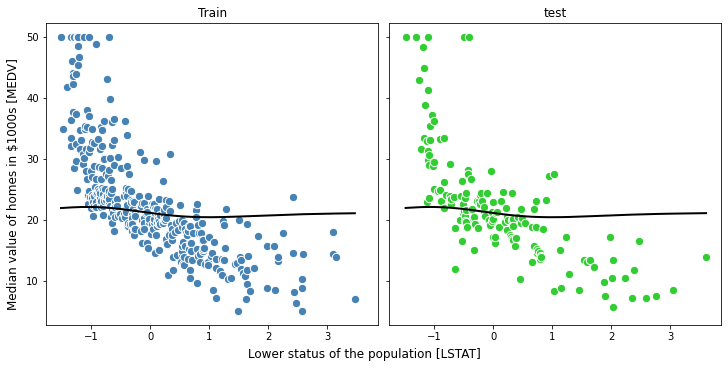

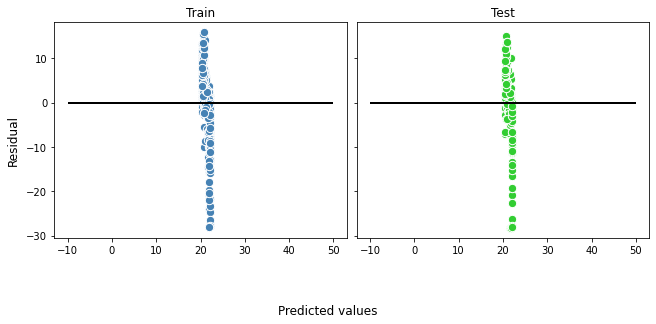

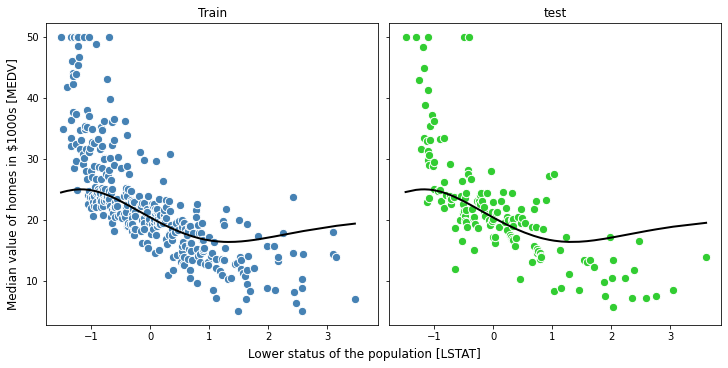

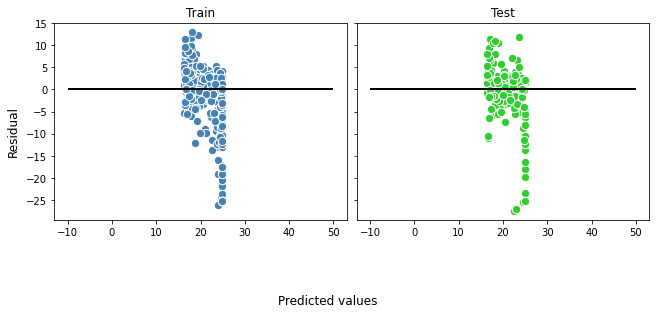

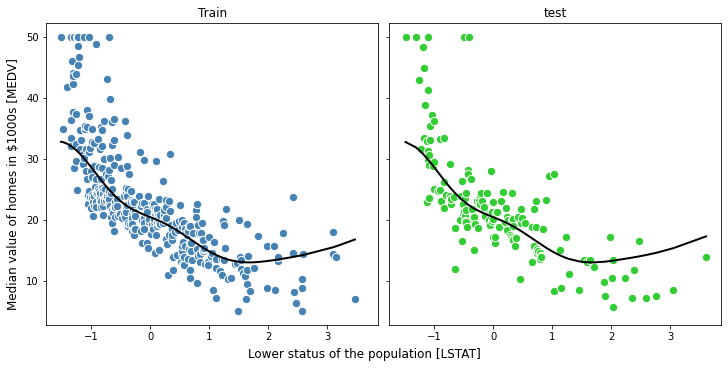

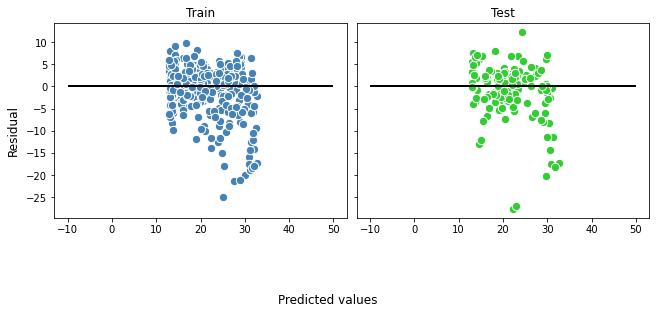

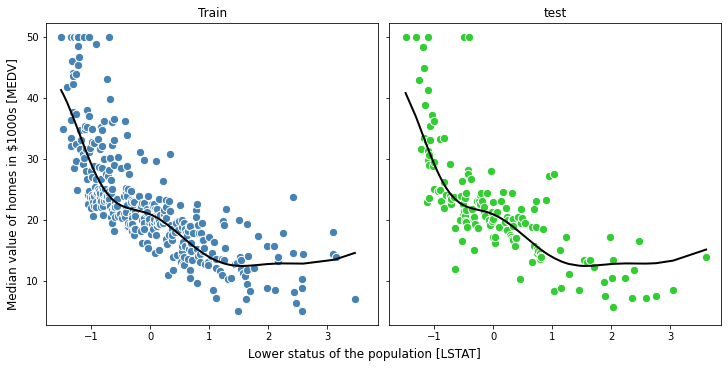

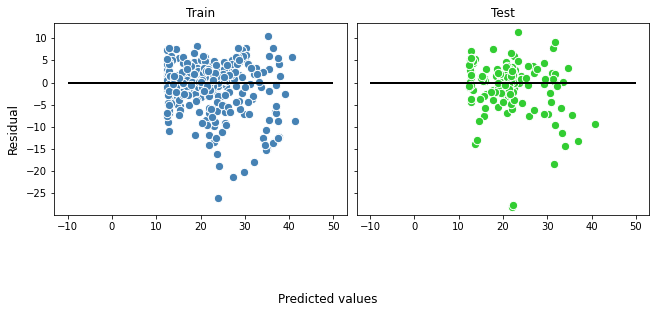

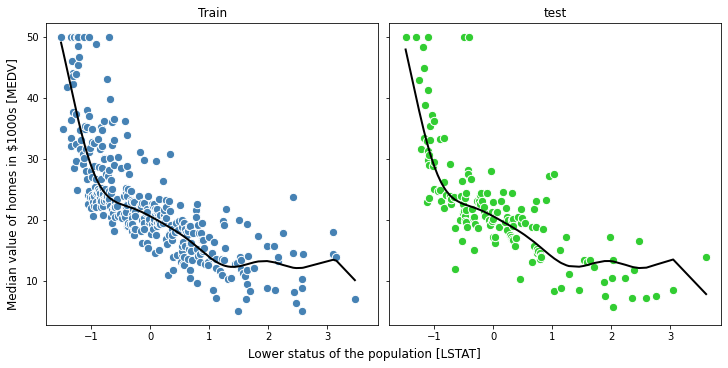

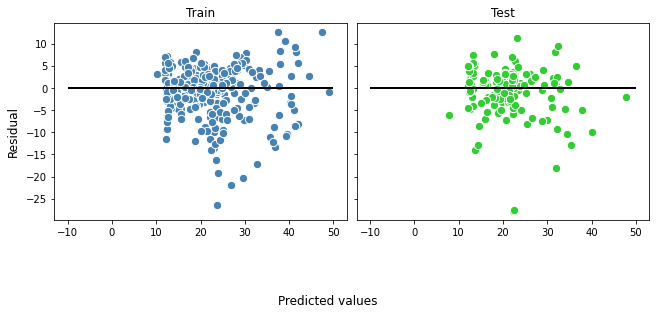

In [32]:
params = [
{
    'C': 0.01,
    'epsilon': 1,
},
{
    'C': 0.1,
    'epsilon': 1,
},
{
    'C': 1,
    'epsilon': 1,
},
{
    'C': 10,
    'epsilon': 1,
},
{
    'C': 100,
    'epsilon': 1,
}
]

dfAll = pd.DataFrame()
for idx, param in enumerate(params):
    svr = SVR(**param)
    dfAll = run_model(
        model=svr,
        model_name=f"{json.dumps(param)}",
        X_train=X_train_std,
        y_train=y_train,
        X_test=X_test_std,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)